In [12]:
import pandas as pd
person =  pd.read_csv('./data/survey_person.csv')
site =  pd.read_csv('./data/survey_site.csv')
survey =  pd.read_csv('./data/survey_survey.csv')
visited =  pd.read_csv('./data/survey_visited.csv')

visited_subset = visited.loc[[0,2,6],]
#visited/site - site/lat
#person/ident - survey/person
#visited/ident - survey/taken

#merge
ps = person.merge(survey, left_on='ident', right_on='person')
vs = visited.merge(site, left_on='site', right_on='name')
sv = survey.merge(visited, left_on='taken', right_on='ident')
aa = ps.merge(vs, left_on='taken' right_on='taken')
aa.merge(sv, left_on='site', right_on='site')

SyntaxError: invalid syntax (<ipython-input-12-c8193b7c5fed>, line 16)

In [ ]:
#결측치 처리
1. 누락값 확인하기
2. 누락값이 생기는 이유: 입력 잘못, 의도적입력, 연결시 발생
3. 누락값의 개수
4. 누락값 처리하기

In [28]:
#누락값
from numpy import NaN, NAN, nan

NAN == NaN
NaN == nan
nan == ''

pd.isnull(NaN)
pd.isnull(NAN)
pd.isnull('') #x
pd.isnull(0) #x

pd.notnull(NAN)
pd.notnull('')

True

In [34]:
vs = visited.merge(survey, left_on='ident', right_on='taken')
vs

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


In [43]:
gapminder = pd.read_csv('./data/gapminder.tsv', "\t")
gapminder.info()
year_exp = gapminder.groupby('year')['lifeExp'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


year
2000          NaN
2001          NaN
2002    65.694923
2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007    67.007423
2008          NaN
2009          NaN
Name: lifeExp, dtype: float64

In [45]:
import warnings
warnings.filterwarnings('ignore')

# year_exp.loc[range(2000,2010),] NaN값 발생
year_exp[year_exp.index >= 2000]

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [59]:
ebola = pd.read_csv('./data/country_timeseries.csv')
# ebola.count() #결측치를 제외한 개수
# ebola.info()

num_rows = ebola.shape[0]
num_missing = num_rows - ebola.count()
print(num_missing)

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64


In [72]:
import numpy as np

np.count_nonzero(ebola.Deaths_Mali.isnull())
#지정한 열의 빈도구하기..NaN포함
ebola.Cases_Guinea.value_counts(dropna=False)
#NaN불포함
ebola.Cases_Guinea.value_counts(dropna=True)

NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
          ..
235.0      1
231.0      1
226.0      1
224.0      1
2776.0     1
Name: Cases_Guinea, Length: 89, dtype: int64

In [79]:
# ebola.fillna(0)
ebola.fillna(method="ffill") #전 값으로 채우기
ebola.fillna(method="bfill") #다음 값으로 채우기


#양쪽 중간값으로 채우기
ebola.interpolate()


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.000000,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.000000,NaN,2977.000000,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.000000,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.000000,NaN,2943.000000,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.000000,8166.000000,9722.0,NaN,NaN,NaN,NaN,NaN,1767.000000,3496.0,2915.000000,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2749.500000,8157.000000,9677.5,NaN,NaN,NaN,NaN,NaN,1753.000000,3496.0,2871.000000,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.000000,8115.000000,9633.0,NaN,NaN,NaN,NaN,NaN,1739.000000,3471.0,2827.000000,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.000000,8018.000000,9446.0,NaN,NaN,NaN,NaN,NaN,1708.000000,3423.0,2758.000000,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.000000,7997.500000,9409.0,NaN,NaN,NaN,NaN,NaN,1697.000000,3418.0,2732.000000,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.000000,7977.000000,9203.0,NaN,NaN,NaN,NaN,NaN,1652.000000,3413.0,2655.000000,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.000000,7919.500000,9004.0,NaN,NaN,NaN,NaN,NaN,1607.000000,3398.5,2582.000000,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.000000,7862.000000,8939.0,NaN,NaN,NaN,NaN,NaN,1586.000000,3384.0,2556.000000,NaN,NaN,NaN,NaN,NaN


In [81]:
#결측치 제거
ebola.dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [85]:
#NaN과 포함한 계산은 NaN
#결측치는 빼고 계산해라.
ebola.Cases_Guinea.sum(skipna = True) + \
ebola.Cases_Liberia.sum(skipna = True) + \
ebola.Cases_SierraLeone.sum(skipna = True)



489743.0

In [90]:
#!conda list matplolrip
!pip install seaborn

In [91]:
!pip install matplotlib

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('./data/titanic.xls')
df.head(2)

#sibsp: 형제 또는 부부의 수
#parch: 부모 또는 자녀의 수
#embarked: 선착장
#boat: 보트번호
#cabin:좌석

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [95]:
!pip install xlrd

In [105]:
df.describe() #38퍼센트 생존

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


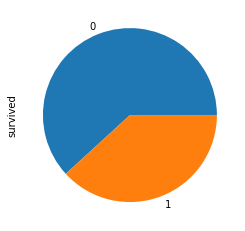

In [109]:
#생존건수
df.survived.value_counts()
type(df.survived.value_counts())

df.survived.value_counts().plot.pie()

Text(0.5, 1.0, '생존율 count plot')

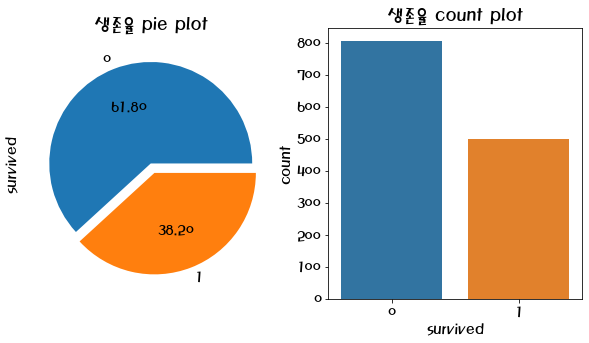

In [143]:
f, ax = plt.subplots(1,2,figsize = (10,5))
df.survived.value_counts().plot.pie(explode =(0,0.1), autopct = '%.2f', ax=ax[0])

sns.countplot('survived', data=df, ax=ax[1])
ax[0].set_title('생존율 pie plot')
ax[1].set_title('생존율 count plot')

In [124]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:/windows/Fonts/HMKMMAG.TTF').get_name()
rc("font",family=font_name, size=15)

1        0.9167
2        2.0000
94       4.0000
273      6.0000
339      1.0000
         ...   
1230     2.0000
1240     0.4167
1256     7.0000
1257     9.0000
1265    10.0000
Name: age, Length: 86, dtype: float64

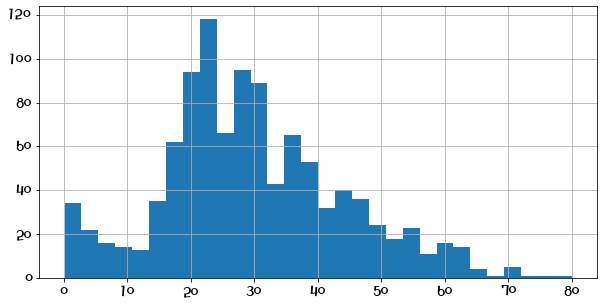

In [158]:
df.age.hist(bins=30, figsize=(10,5))

In [171]:
#10대 생존율
df[(df.age >= 10) & (df.age < 20)].survived.count()
#50대 이상 생존율
df[df.age >= 50].survived.count()

110

In [209]:
#0~10 : baby
#11~20 : teenage
#21~50 : adult
#51~ : old

def add_category(age):
    if pd.isnull(age):
        return NaN
    
    if age <= 10:
        return 'baby'
    elif (age > 10) & (age <= 20):
        return 'teenage'
    elif (age > 20) & (age <= 50):
        return 'adult'
    else:
        return 'old'
    
#칼럼이름을 age_category로 추가한다.
df['age_category'] = df.age.apply(add_category)

df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_category,age_category2
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,adult


In [203]:
df['age_category2'] = pd.cut(df['age'], bins=[0,10,20,50,100],
                                        include_lowest=True,
                                        labels=['baby','teenage','adult','old'])
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_category,age_category2
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,adult
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult,adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old,old
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult,adult
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",old,old
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",old,old


In [189]:
df['age_category2'] = pd.cut(df['age'], bins=[0,10,20,50,100],
                                        include_lowest=False,
                                        labels=['baby','teenage','adult','old'])
df[df.age == 10]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_category,age_category2
828,3,0,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.900,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY",baby,baby
1141,3,0,"Rice, Master. Albert",male,10.0,4,1,382652,29.125,NaN,Q,NaN,NaN,NaN,baby,baby
1207,3,0,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.900,NaN,S,NaN,NaN,NaN,baby,baby
1265,3,0,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.150,NaN,S,NaN,NaN,NaN,baby,baby


In [210]:
df.age_category.isnull()
df.age_category2.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305     True
1306    False
1307    False
1308    False
Name: age_category2, Length: 1309, dtype: bool

Text(0.5, 1.0, '생존율 count plot')

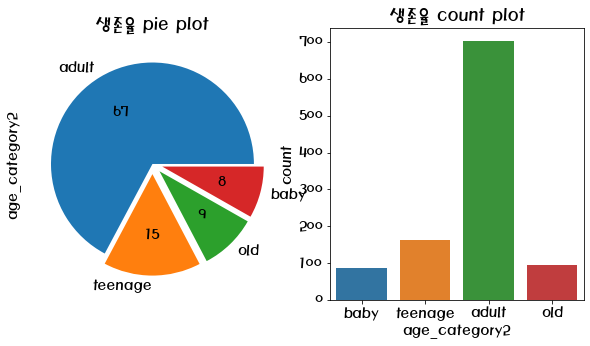

In [221]:
f, ax = plt.subplots(1,2,figsize = (10,5))
df.age_category2.value_counts().plot.pie(explode =(0,0.1,0.1,0.1), autopct = '%d', ax=ax[0])

sns.countplot('age_category2', data=df, ax=ax[1])
ax[0].set_title('생존율 pie plot')
ax[1].set_title('생존율 count plot')

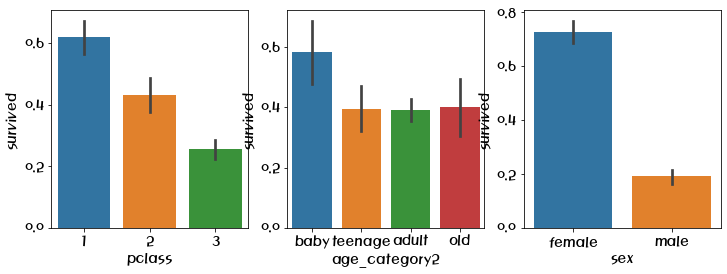

In [223]:
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot('pclass','survived', data=df)
plt.subplot(132)
sns.barplot('age_category2','survived', data=df)
plt.subplot(133)
sns.barplot('sex','survived', data=df)

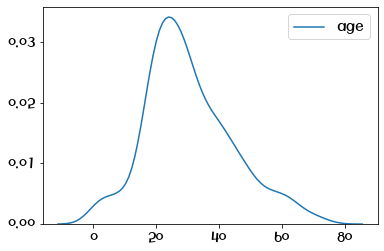

In [233]:
#진짜로 baby가 생존율이 높은가?
#분포곡선-kdeplot(kernel density estimation)
#사망자중에 나이를 알 수 있는 데이터 추출
death_age = df[(df['survived']==0) & (df['age'].notnull())].age
death_age.shape

survive_age = df[(df['survived']==1) & (df['age'].notnull())].age

sns.kdeplot(death_age)

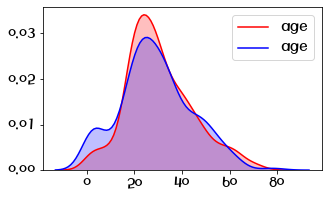

In [244]:
f, ax = plt.subplots(figsize=(5,3))
death_age = df[(df['survived']==0) & (df['age'].notnull())].age
sns.kdeplot(death_age, ax = ax, color = 'red', shade = True)

survive_age = df[(df['survived']==1) & (df['age'].notnull())].age
sns.kdeplot(survive_age, ax = ax, color = 'blue', shade = True)

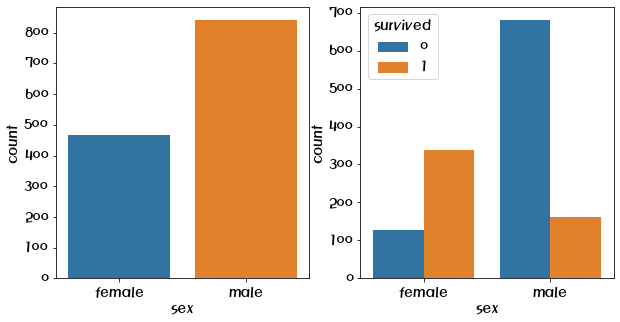

In [303]:
#남여의 비율 --> countplot()...성별의 따른 승객수
#성별의 따른 승객수
#성별에 따른 생존과 사망
#1.
f, ax = plt.subplots(1,2,figsize = (10,5))
sns.countplot('sex', data=df, ax=ax[0])
sns.countplot('sex', data=df, ax=ax[1], hue='survived')

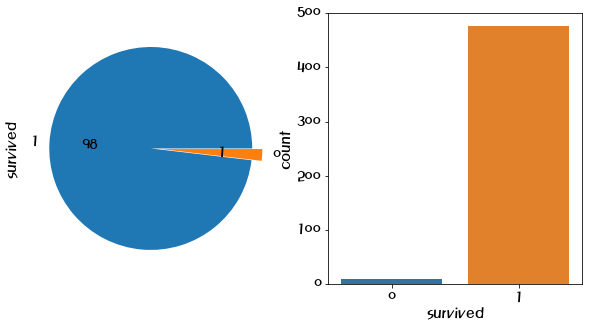

In [344]:
# df[df.boat.notnull()].count()
# df.boat.count()
f, ax = plt.subplots(1,2, figsize = (10,5))
df[df.boat.notnull()].survived.value_counts().plot.pie(explode =(0,0.1), autopct='%d', ax=ax[0])
sns.countplot('survived', data=df[df.boat.notnull()], ax=ax[1])

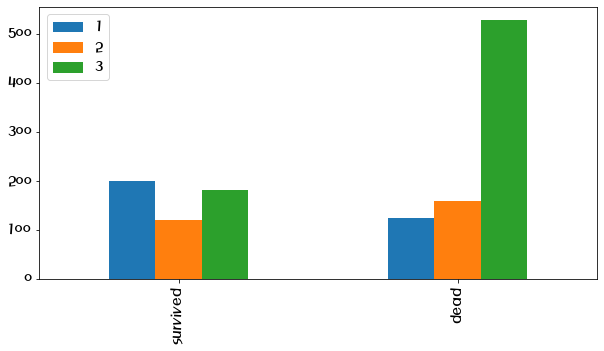

In [360]:
def barChart(feature):
    survived = df[df.survived==1][feature].value_counts()
    dead = df[df.survived==0][feature].value_counts()
    df2 = pd.DataFrame([survived, dead])
    df2.index = ['survived','dead']
    df2.plot(kind = 'bar', stacked=False, figsize=(10,5))
    
barChart('pclass')